In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import time, timeit

import procedure_notebook as procedure
import measurables

In [2]:
proc = procedure.Procedure()
proc.setParameters(L = 3)
N_cycles = 30
setup_state_for_next_cycle = procedure.Procedure.pass_full_density_matrix
using_state_vectors = False
using_density_matrices = True
measure = procedure.Procedure.measure_energy



In [3]:
times = np.arange(0,proc.T+proc.dt, proc.dt)

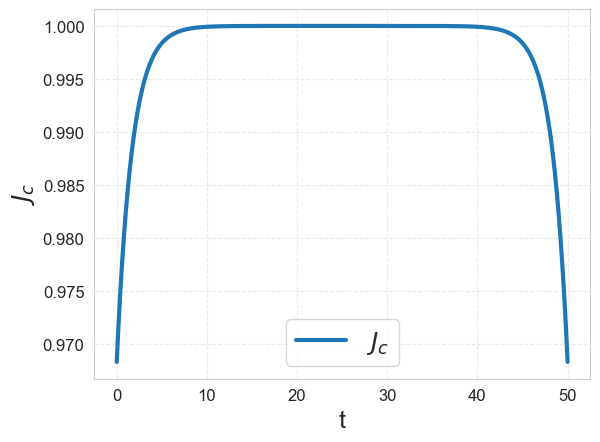

In [4]:
#Stopnica nastavljena na roko, za T = 50
T = proc.T
def smooth_step_coupling_decrease(t):
    assert T == 50

    def g(t): return 1 / (1 + np.exp(t))
    ta = 5.7
    t0 = 0
    t1 = T
    a = 0.6
    #a = 0.2
    def f(t): return g(a * ((t-ta)-t1)) + g(-a * ((t+ta)-t0)) - 1
    return f(t)    



plt.plot(times, [smooth_step_coupling_decrease(t) for t in times], label=r'$J_c$', lw=3.0)
plt.xlabel('t', fontsize = 18)
plt.ylabel('$J_c$', fontsize = 18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=18)
plt.grid(linestyle='--', alpha=0.4)
plt.show()

In [5]:
data = proc.runProcedure(N_cycles=N_cycles, measure=measure,
                          setup_state_for_next_cycle=setup_state_for_next_cycle,
                          coupling_decrease="use_default", using_state_vectors=using_state_vectors ,using_density_matrices=using_density_matrices)


Cycle:   0%|          | 0/30 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

sesolve:   0%|          | 0/500 [00:00<?, ?it/s]

In [6]:
H_TFIM = measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters)
M_TFIM = measurables.tfim_magnetisation(proc.L)

eigen_energies = H_TFIM.eigenenergies()

E0 = eigen_energies[0]
print("TFIM ground energy: ", E0)

TFIM ground energy:  -3.0330302779823373


c:\Users\Uporabnik\anaconda3\envs\IJS2024-Humar_edition\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Uporabnik\anaconda3\envs\IJS2024-Humar_edition\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'TFIM energies during cycles')

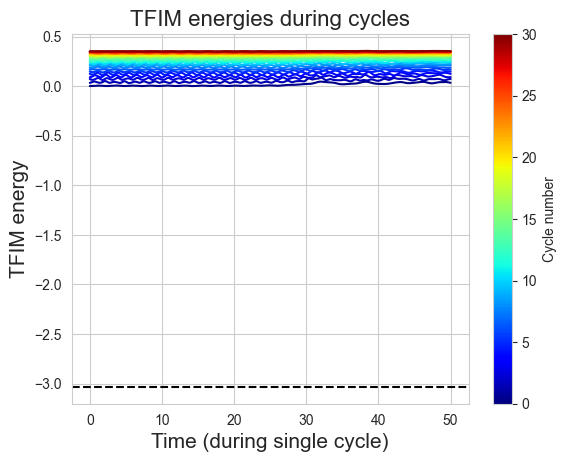

In [7]:
cmap = plt.get_cmap('jet')
COLORS = [cmap(i) for i in np.linspace(.01, .99, N_cycles)]

for i in range(len(data[0,:,0])):
    plt.plot(times, data[0,i,:], color=COLORS[i])

plt.axhline(y=E0, linestyle='--', color='black', label=r"$E_0$")

norm = mpl.colors.Normalize(vmin=0, vmax=N_cycles)
scalarmappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(scalarmappable, ax=plt.gca(), label="Cycle number")

plt.xlabel("Time (during single cycle)", fontsize = 15)
plt.ylabel("TFIM energy", fontsize = 15)
plt.title("TFIM energies during cycles", fontsize = 16)

Text(0.5, 1.0, 'L=3, $\\delta t$=0.1, T=50, J=1.0')

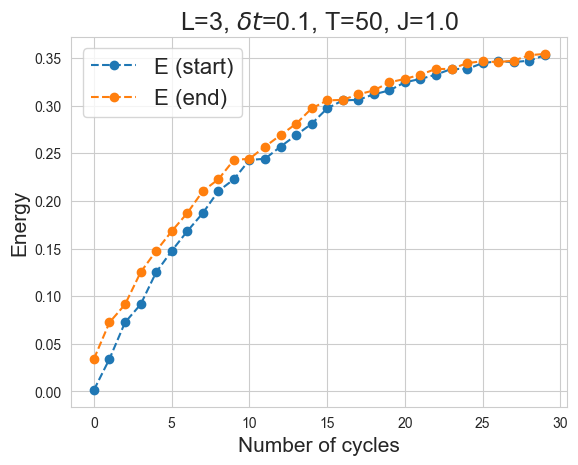

In [10]:
start_cycle_energies = data[0,:,0]
end_cycle_energies = data[0,:,-1]



plt.plot(start_cycle_energies, '--o', label="E (start)")
plt.plot(end_cycle_energies, '--o', label="E (end)")

#plt.axhline(y=E0, linestyle='--', color='black', label=r"$E_0$")

i = 0
j = 0
E = E0
while True:
    try:
        i += 1
        #print(f"{E}  {j}  {i}")
        if eigen_energies[i] > np.max(start_cycle_energies) and eigen_energies[i] > np.max(end_cycle_energies):
            break
        if np.round(eigen_energies[i], 2) == np.round(E,2):
            continue

        plt.axhline(y=eigen_energies[i], linestyle='--', color='gray')
        j += 1
        E = eigen_energies[i]
    except IndexError:
        break

J, hx, hz = proc.tfim_parameters


plt.legend(fontsize = 16)
plt.xlabel('Number of cycles', fontsize = 15)
plt.ylabel('Energy', fontsize = 15)
plt.title(fr'L={proc.L}, $\delta t$={proc.dt}, T={T}, J={J}', fontsize = 18) 